In [1]:
library(R2jags)

Warning message:
"package 'R2jags' was built under R version 4.0.3"
Loading required package: rjags

Warning message:
"package 'rjags' was built under R version 4.0.3"
Loading required package: coda

Warning message:
"package 'coda' was built under R version 4.0.3"
Linked to JAGS 4.3.0

Loaded modules: basemod,bugs


Attaching package: 'R2jags'


The following object is masked from 'package:coda':

    traceplot




**PROBLEM 1**

Run the model given with different sample sizes and burn-in sizes. Obtain the posterior density and a 95% probability interval for $\gamma = \theta_1 - \theta_2$. 

95% interval for $\gamma$: (.046, .251)

In [38]:
model_string2 <- "model {
y1 ~ dbin(theta1, n1) #modeling the data as 
y2 ~ dbin(theta2, n2) #independent binomials
theta1 ~ dbeta(1,1) #specifying the priors
theta2 ~dbeta(1, 1)
prob1 <- step(theta1 - theta2) #P(theta1 >= theta2 | data)
y1tilde ~ dbin(theta1, m1) #get predictive densities
y2tilde ~ dbin(theta2, m2)
prob2 <- step(y1tilde - y2tilde - 11)
gamma <- theta1 - theta2
}"

jags.data2 <- list(y1 = 25, y2 = 10, n1 = 100, n2 = 100, m1 = 100, m2 = 100) #data being used 
jags.param2 <- c("y1", "y2", "theta1", "theta2", "prob1", "prob2", "y1tilde", "y2tilde", "prob2", "gamma")

First run: 50,000 iterations and a burn-in of 10,000. 

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 4
   Total graph size: 17

Initializing model



Warning message in FUN(X[[i]], ...):
"Failed to set trace monitor for prob2
Monitor already exists and cannot be duplicated
"


Inference for Bugs model at "20", fit using jags,
 3 chains, each with 50000 iterations (first 10000 discarded), n.thin = 10
 n.sims = 12000 iterations saved
         mu.vect sd.vect   2.5%    25%    50%    75%  97.5%  Rhat n.eff
gamma      0.147   0.053  0.045  0.111  0.146  0.182  0.251 1.001  4000
prob1      0.998   0.045  1.000  1.000  1.000  1.000  1.000 1.002 12000
prob2      0.712   0.453  0.000  0.000  1.000  1.000  1.000 1.001  3300
theta1     0.255   0.043  0.176  0.225  0.254  0.283  0.344 1.001  8000
theta2     0.108   0.031  0.055  0.087  0.106  0.127  0.176 1.001  6600
y1        25.000   0.000 25.000 25.000 25.000 25.000 25.000 1.000     1
y1tilde   25.487   6.103 14.000 21.000 25.000 29.000 38.000 1.002  2900
y2        10.000   0.000 10.000 10.000 10.000 10.000 10.000 1.000     1
y2tilde   10.835   4.370  4.000  8.000 10.000 14.000 20.000 1.001  7000
deviance  10.829   1.995  8.882  9.387 10.201 11.619 16.336 1.001  7700

For each parameter, n.eff is a crude measure of e

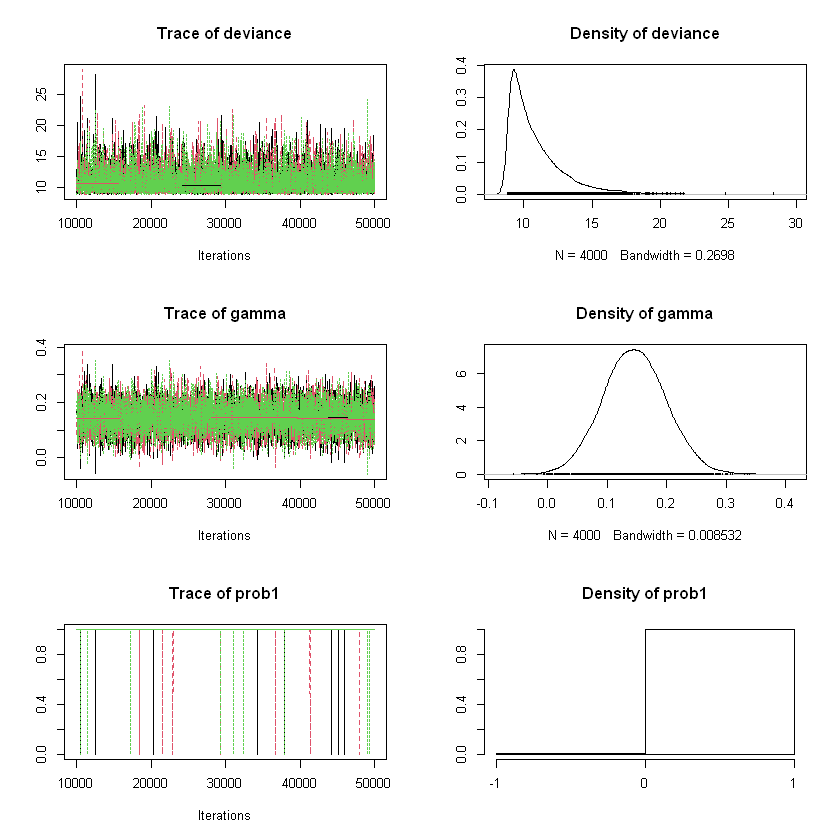

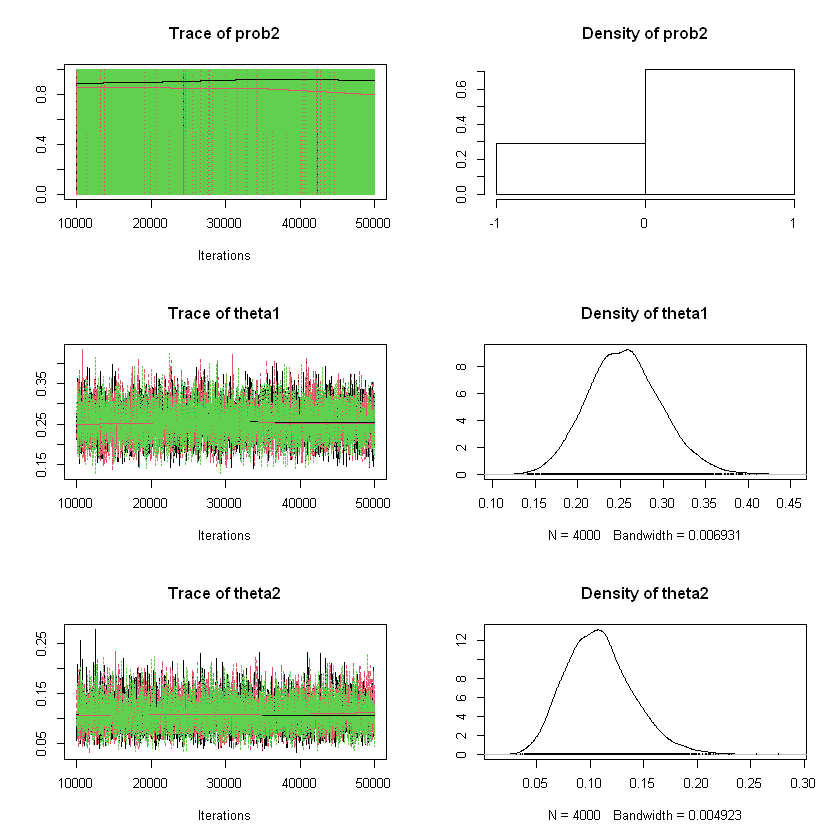

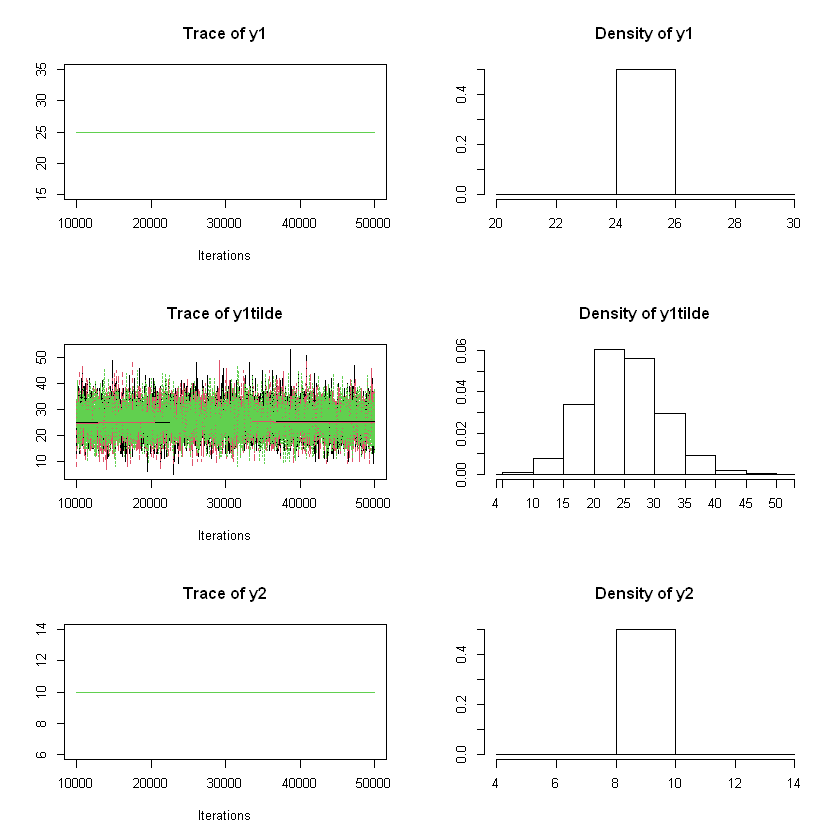

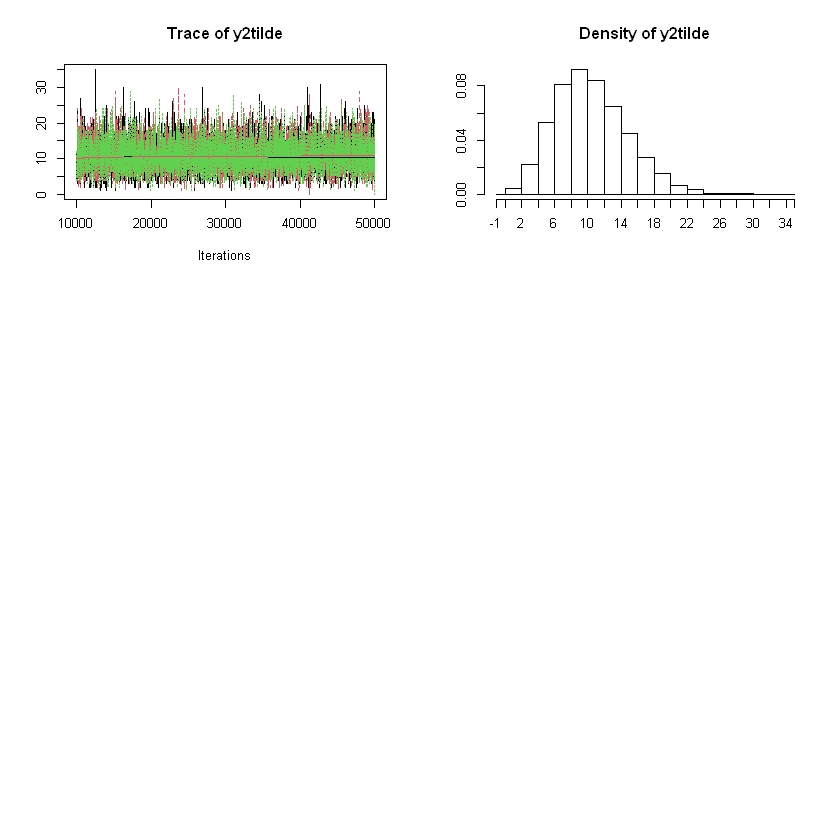

In [76]:
jags.fit2 <- jags(data=jags.data2, inits=NULL, parameters.to.save = jags.param2,
                model.file=textConnection(model_string2), n.chains=3, n.iter=50000, 
                n.burnin=10000, n.thin=10, DIC=T)
jags.mcmc2=as.mcmc(jags.fit2)
print(jags.fit2)
plot(jags.mcmc2)

A different variant: only 450 iterations, and a burn-in of 0. 

I was a bit surprised to see that many of the $\hat{R}$ values were not terrible. 

In [69]:
jags.fit3 <- jags(data=jags.data2, inits=NULL, parameters.to.save = jags.param2,
                model.file=textConnection(model_string2), n.chains=3, n.iter=450, 
                n.burnin=0, n.thin=10, DIC=T)
jags.mcmc3=as.mcmc(jags.fit3)
print(jags.fit3)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 4
   Total graph size: 17

Initializing model



Warning message in FUN(X[[i]], ...):
"Failed to set trace monitor for prob2
Monitor already exists and cannot be duplicated
"


Inference for Bugs model at "16", fit using jags,
 3 chains, each with 450 iterations (first 0 discarded), n.thin = 10
 n.sims = 135 iterations saved
         mu.vect sd.vect   2.5%    25%    50%    75%  97.5%  Rhat n.eff
gamma      0.139   0.053  0.034  0.106  0.145  0.176  0.228 1.032   100
prob1      0.993   0.086  1.000  1.000  1.000  1.000  1.000 1.289   130
prob2      0.674   0.470  0.000  0.000  1.000  1.000  1.000 1.000   140
theta1     0.250   0.044  0.170  0.219  0.247  0.274  0.342 1.028   110
theta2     0.111   0.032  0.062  0.087  0.109  0.133  0.180 1.012   140
y1        25.000   0.000 25.000 25.000 25.000 25.000 25.000 1.000     1
y1tilde   24.667   6.011 14.000 19.500 25.000 29.000 36.300 1.009   110
y2        10.000   0.000 10.000 10.000 10.000 10.000 10.000 1.000     1
y2tilde   11.281   4.595  3.000  8.000 11.000 14.000 21.650 1.010   140
deviance  10.954   2.099  8.907  9.571 10.408 11.530 16.295 1.108    30

For each parameter, n.eff is a crude measure of effective

For an extreme example, I ran it with number iterations = 20 and burn-in = 0, and unsurprisingly the $\hat{R}$'s are terrible, and in general the results are not super close to the chain with a high number of iterations and moderate burn-in. 

In [75]:
jags.fit4 <- jags(data=jags.data2, inits=NULL, parameters.to.save = jags.param2,
                model.file=textConnection(model_string2), n.chains=3, n.iter=20, 
                n.burnin=0, n.thin=10, DIC=T)
jags.mcmc4=as.mcmc(jags.fit4)
print(jags.fit4)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 4
   Total graph size: 17

Initializing model



Warning message in FUN(X[[i]], ...):
"Failed to set trace monitor for prob2
Monitor already exists and cannot be duplicated
"


Inference for Bugs model at "21", fit using jags,
 3 chains, each with 20 iterations (first 0 discarded), n.thin = 10
 n.sims = 6 iterations saved
         mu.vect sd.vect   2.5%    25%    50%    75%  97.5%  Rhat n.eff
gamma      0.102   0.067  0.002  0.073  0.115  0.134  0.182 2.563     4
prob1      0.833   0.408  0.125  1.000  1.000  1.000  1.000 1.325     6
prob2      0.667   0.516  0.000  0.250  1.000  1.000  1.000 0.982     6
theta1     0.235   0.038  0.190  0.217  0.236  0.241  0.294 1.493     5
theta2     0.133   0.055  0.087  0.107  0.112  0.139  0.227 2.596     4
y1        25.000   0.000 25.000 25.000 25.000 25.000 25.000 1.000     1
y1tilde   23.000   7.537 12.500 17.750 25.500 28.000 30.625 0.950     6
y2        10.000   0.000 10.000 10.000 10.000 10.000 10.000 1.000     1
y2tilde   11.833   5.672  8.000  8.000  9.000 13.750 21.125 3.728     3
deviance  12.189   4.794  8.922  9.334 10.924 11.661 20.418 1.643     5

For each parameter, n.eff is a crude measure of effective sa

**Problem 4**

$Y|n,p \sim Bin(n,p)$

Priors: 
$n \sim Poisson(\lambda)$ , $p \sim Beta(a,b)$

Data: y = 10

a) Describe why convergence may be slow for this model:

This is a complicated model. I think the reason we might have issues is because with any combination of n and p we can expect y = 10. For example, binomial(n = 20, p = .5) or binomial(n = 40, p = .25). 

b) Fit the model in Jags with:

$\lambda = 10$, $a = 1$, $b = 1$. Check the convergence and summarize the posterior of n, p, and $\theta = np$. 

In [85]:
model_string3 <- "model {
Y ~ dbin(p, n)
n ~ dpois(lambda)
p ~ dbeta(a, b)
theta <- n*p
}"

In [86]:
jags.data3 <- list(Y = 10, lambda = 10, a = 1, b = 1)  
jags.param3 <- c('n', 'p', 'theta') 
jags.fit3 <- jags(data=jags.data3, inits=NULL, parameters.to.save = jags.param3,
                model.file=textConnection(model_string3), n.chains=3, n.iter=50000, 
                n.burnin=1000, n.thin=10, DIC=T)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 2
   Total graph size: 7

Initializing model



Inference for Bugs model at "9", fit using jags,
 3 chains, each with 50000 iterations (first 1000 discarded), n.thin = 10
 n.sims = 14700 iterations saved
         mu.vect sd.vect   2.5%    25%    50%    75%  97.5%  Rhat n.eff
n         12.005   1.990 10.000 10.000 12.000 13.000 17.000 1.001 15000
p          0.798   0.141  0.479  0.707  0.821  0.913  0.991 1.001 15000
theta      9.386   1.243  6.667  8.691  9.504 10.087 11.791 1.001 13000
deviance   2.990   1.664  0.203  2.053  2.869  3.638  6.948 1.001 15000

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor (at convergence, Rhat=1).

DIC info (using the rule, pD = var(deviance)/2)
pD = 1.4 and DIC = 4.4
DIC is an estimate of expected predictive error (lower deviance is better).


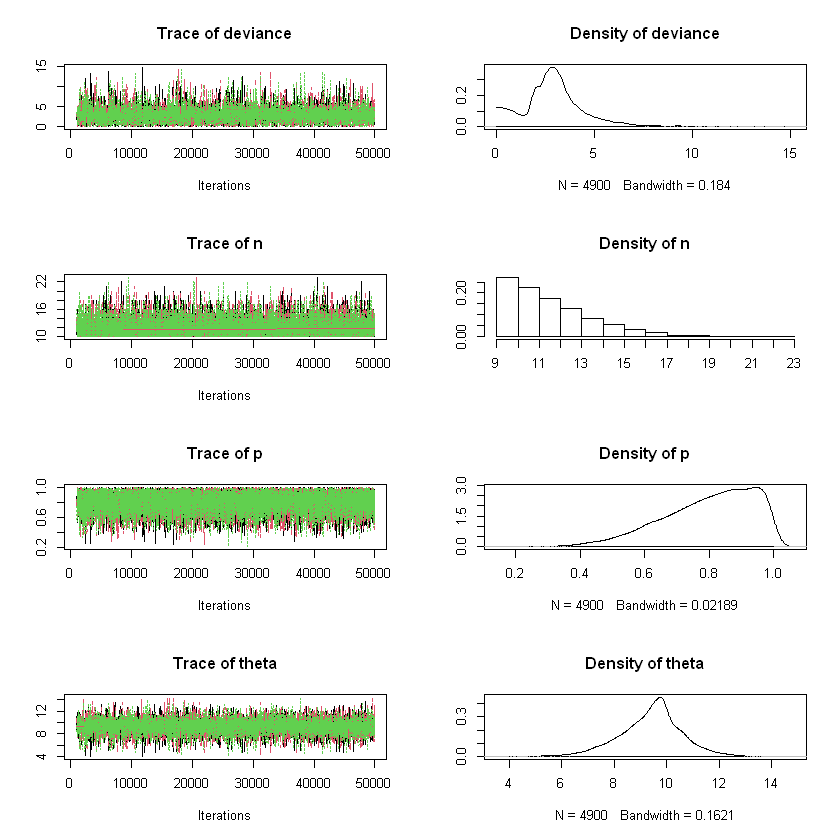

In [87]:
print(jags.fit3)
jags.mcmc3=as.mcmc(jags.fit3)
plot(jags.mcmc3)

b) Repeat the analysis but with a = b = 10. Comment on the effect of the prior distribution of p on convergence for all 3 parameters. 

Based on the $\hat{R}$ values, the convergence of the chains for both models looks good (1.001 is very close to 1). However, checking the effective sample size: for the model that used a uniform distribution as the prior, the effective sample size for "theta" is e.g. 13000 vs 5100. With the uniform prior, the effective sample size for "n" is slightly higher. "p" is unnaffected in either case. 

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 2
   Total graph size: 7

Initializing model

Inference for Bugs model at "10", fit using jags,
 3 chains, each with 50000 iterations (first 1000 discarded), n.thin = 10
 n.sims = 14700 iterations saved
         mu.vect sd.vect   2.5%    25%    50%    75%  97.5%  Rhat n.eff
n         14.145   2.227 10.000 13.000 14.000 16.000 19.000 1.001 12000
p          0.588   0.091  0.408  0.527  0.589  0.652  0.763 1.001 15000
theta      8.240   1.406  5.701  7.262  8.159  9.144 11.180 1.001  5100
deviance   4.623   1.753  2.903  3.391  4.036  5.313  9.322 1.002  3200

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor (at convergence, Rhat=1).

DIC info (using the rule, pD = var(deviance)/2)
pD = 1.5 and DIC = 6.2
DIC is an estimate of expected predictive error (lower devi

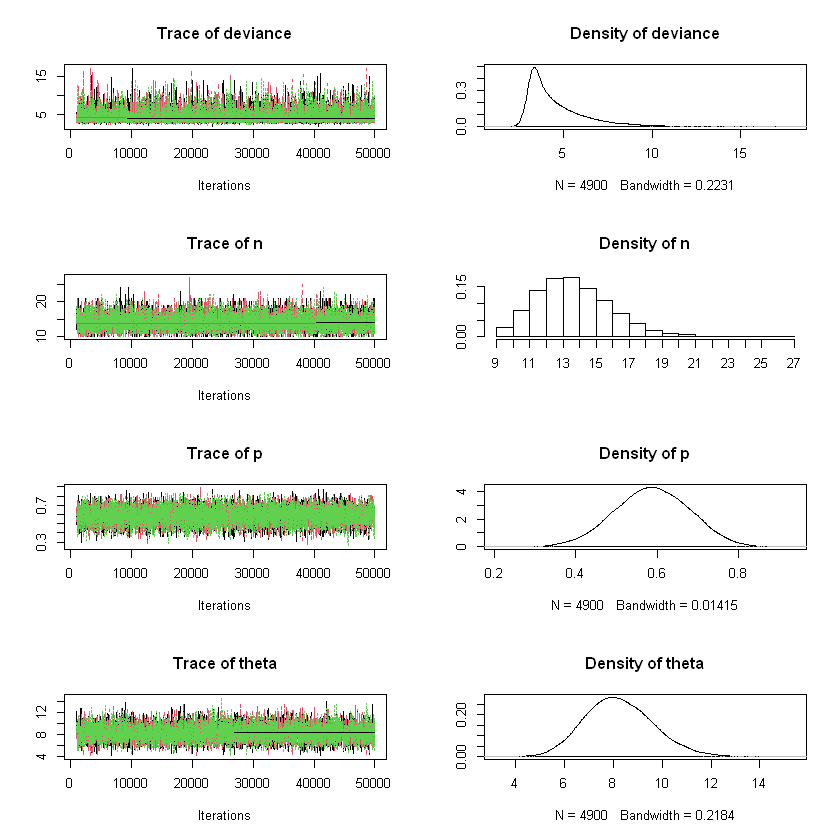

In [88]:
jags.data3 <- list(Y = 10, lambda = 10, a = 10, b = 10) #data being used 
jags.fit3 <- jags(data=jags.data3, inits=NULL, parameters.to.save = jags.param3,
                model.file=textConnection(model_string3), n.chains=3, n.iter=50000, 
                n.burnin=1000, n.thin=10, DIC=T)
print(jags.fit3)
jags.mcmc3=as.mcmc(jags.fit3)
plot(jags.mcmc3)

**PROBLEM 3**

a) Explain why this may be a reasonable prior for $\theta_i$. 

First, it the prior depends on the overall proportion of clutch shot successes, with a higher $q$ making the distribution heavier on the right hand side (which makes sense because a player with a higher success rate will have the prior reflect that). Secondly, it is multiplied by $e^m$, which is going to make how "sure" we are about the distribution now dependent on our normally distributed $m$. In effect I think what this is trying to do is factor in how a player can get "lucky" or "unlucky" sometimes.   

b) Explain the role of m in the prior. 

The role of m is to introduce some dependency between players. In this hierarchical model, we can view m as the parameter at the very lowest level that ultimately is what connects all the $Y_i$'s together. 

c) Fit the model in JAGS. Obtain a table of posterior means and 95% credible intervals for all 11 models parameters. Interpret the results. 

For each of the 1 through 10 players, for a given clutch attempt they all have been roughly a .7 to .9 chance of a succesful shot. The 95% confidence interval for each $\theta$ is relatively small, with the lower end of the interval being only around .1 away from the higher end of the interval. This is a significantly smaller interval than I had when I did HW1 and did not use a hierachical model. I also want to note that the graphs of the $\theta$s look a lot like Laplacian distributions, but I'm not really sure why that would happen. 

For m, there is a much wider range.  

$m = (4.124, 9.869)$ <br>
$\theta_1  = (.817, .887)$ <br>
$\theta_2  = (.716,.798)$ <br>
$\theta_3  = (.838, .905)$ <br>
$\theta_4  = (.642,.741)$ <br>
$\theta_5  = (.874,.931)$ <br>
$\theta_6  = (.892,.951)$ <br>
$\theta_7  = (.633,.732)$ <br>
$\theta_8  = (.765,.842)$ <br>
$\theta_9  = (.695,.785)$ <br>
$\theta_{10} = (.767,.856)$ <br>




Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 10
   Unobserved stochastic nodes: 11
   Total graph size: 76

Initializing model



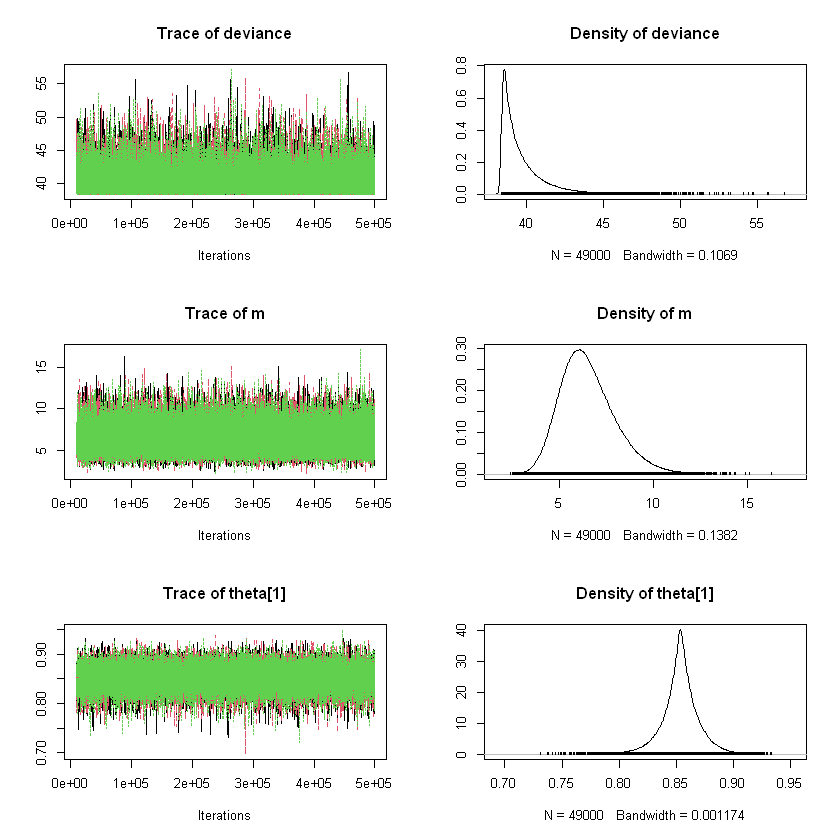

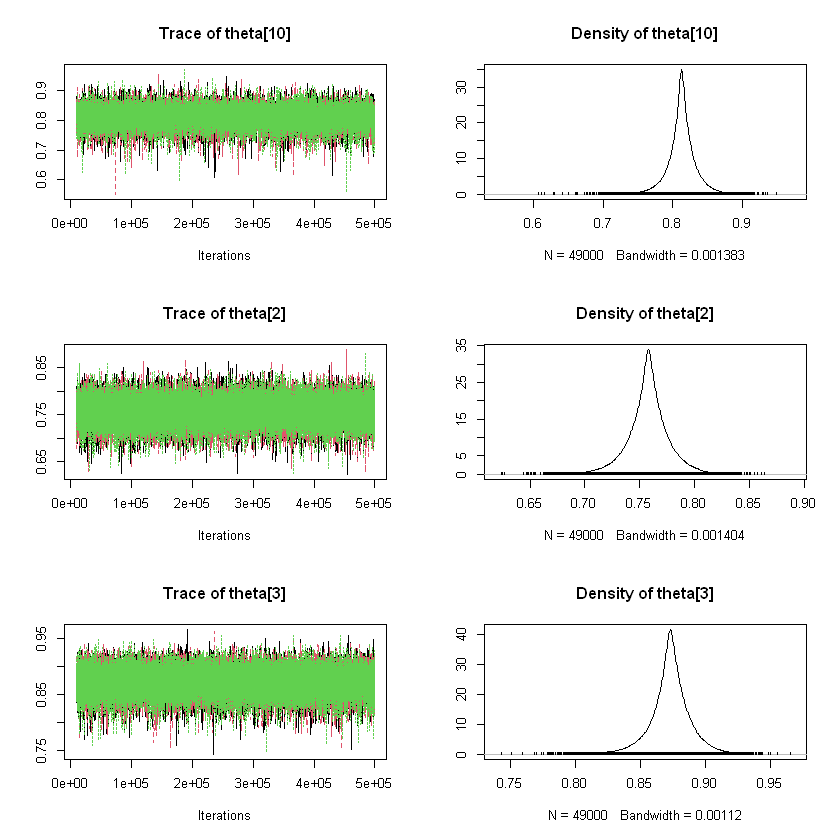

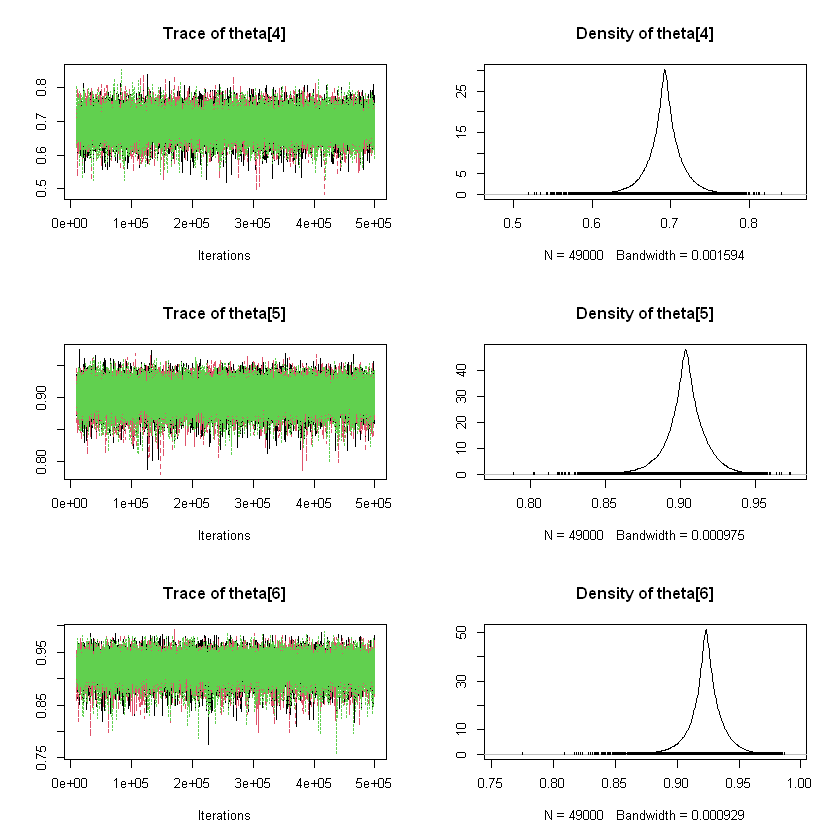

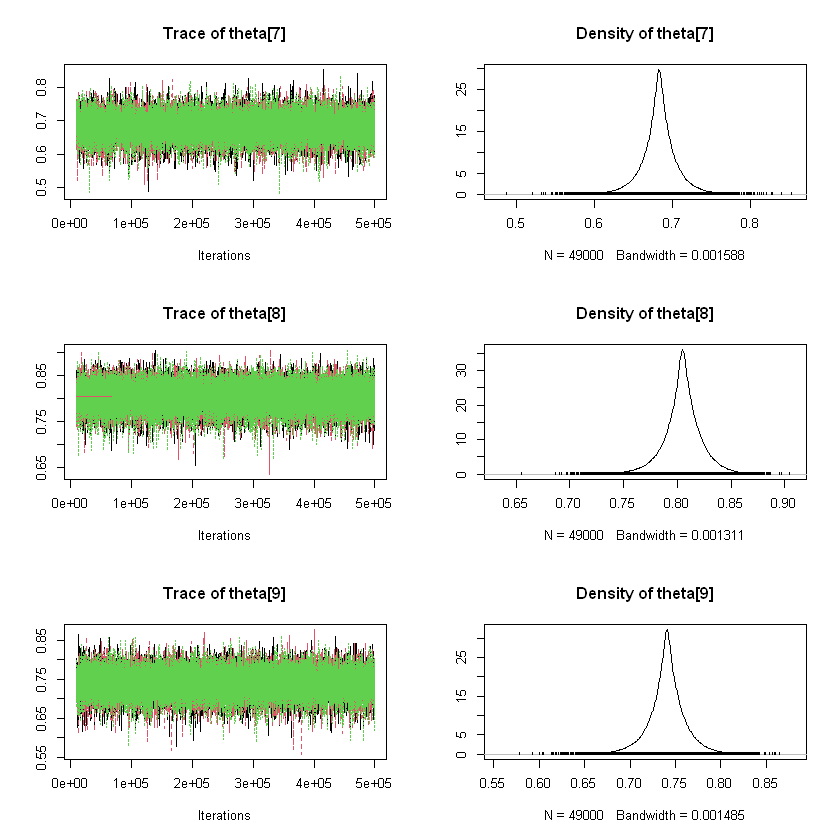

In [26]:
basketball_model <- "model {
for(i in 1:10){
y[i] ~ dbin(theta[i], n[i])
theta[i] ~ dbeta(m2*q[i], m2*(1 - q[i]) )
}
m ~ dnorm(0, 1/10)
m2  = exp(m)
}"
jags.basketball_data = list(n = c(75, 95, 63, 39, 83, 26, 41, 82, 54, 16), y = c(64, 72, 55, 27, 75, 24, 28, 66, 40, 13), q = y/n)
jags.basketball_param = c("theta", "m")
jags.basketball_fit <- jags(data=jags.basketball_data, inits=NULL, parameters.to.save = jags.basketball_param,
                model.file=textConnection(basketball_model), n.chains=3, n.iter=500000, 
                n.burnin=10000, n.thin=10, DIC=T)
jags.mcmc_basketball=as.mcmc(jags.basketball_fit)
plot(jags.mcmc_basketball)

In [37]:
print(jags.basketball_fit)

Inference for Bugs model at "6", fit using jags,
 3 chains, each with 5e+05 iterations (first 10000 discarded), n.thin = 10
 n.sims = 147000 iterations saved
          mu.vect sd.vect   2.5%    25%    50%    75%  97.5%  Rhat  n.eff
m           6.528   1.468  4.124  5.496  6.354  7.383  9.869 1.001  55000
theta[1]    0.853   0.016  0.817  0.846  0.854  0.862  0.887 1.001  67000
theta[2]    0.758   0.019  0.716  0.748  0.758  0.768  0.798 1.001 150000
theta[3]    0.873   0.016  0.838  0.866  0.873  0.881  0.905 1.001 110000
theta[4]    0.692   0.023  0.642  0.682  0.693  0.703  0.741 1.001  57000
theta[5]    0.904   0.013  0.874  0.897  0.904  0.911  0.931 1.001  28000
theta[6]    0.923   0.014  0.892  0.917  0.923  0.930  0.951 1.001 150000
theta[7]    0.683   0.023  0.633  0.672  0.683  0.694  0.732 1.001 150000
theta[8]    0.805   0.018  0.765  0.796  0.805  0.814  0.842 1.001 150000
theta[9]    0.741   0.021  0.695  0.731  0.741  0.751  0.785 1.001 150000
theta[10]   0.813   0.021  0

In [24]:
library(coda)

d) Comment on the autocorrelation and the mixing of the chain:

Based on the autocorrelation plots below, it seems like the chain has mixed properly: looking at all the "thetas", the autocorrelation drops of very quickly. For m, it's not nearly as good.  

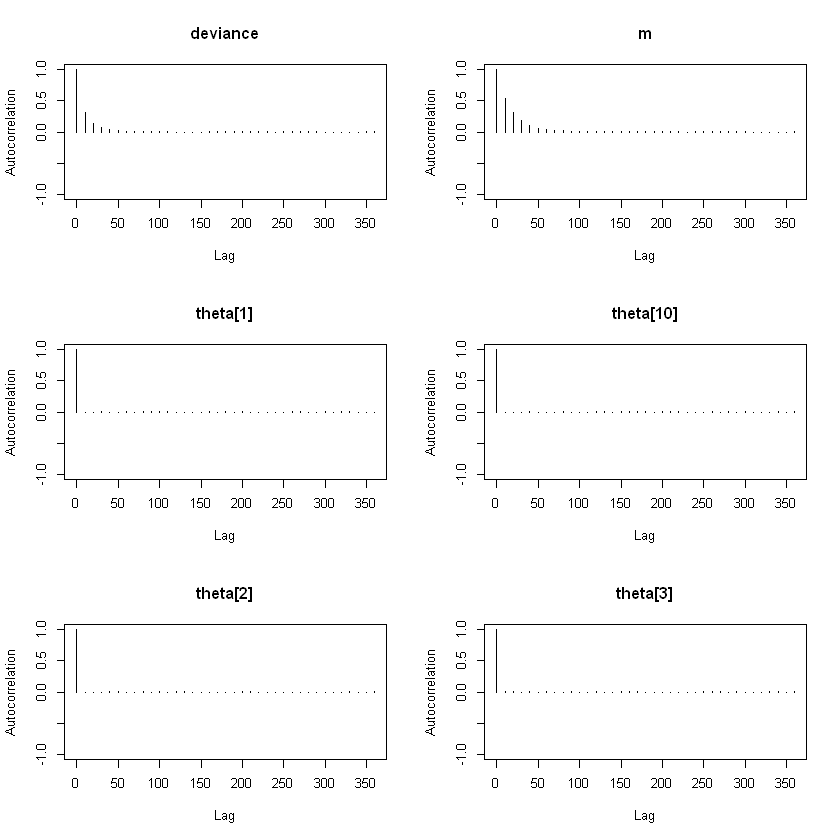

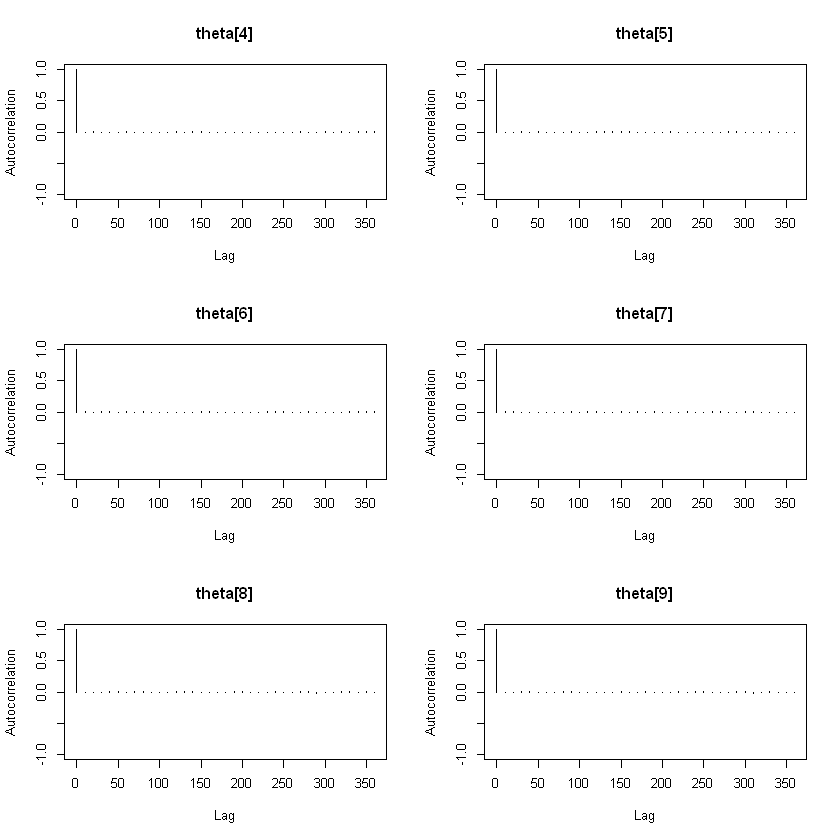

In [13]:
autocorr.plot(jags.mcmc_basketball)

d) Comment on the convergence of the chain. 

The chains have converged: looking at the $\hat{R}$ values, they are all very close to 1. The effective sample sizes are also all very high, which is good. 

In [25]:
jags.sum_basketball<-summary(jags.mcmc_basketball)
jags.sum_basketball$statistics
effectiveSize(jags.basketball_fit)
print(jags.basketball_fit)

,Mean,SD,Naive SE,Time-series SE
deviance,39.6455599,1.49936258,3.910641e-03,5.914434e-03
m,6.5198660,1.45832758,3.803614e-03,7.283371e-03
theta[1],0.8533163,0.01634931,4.264231e-05,4.294048e-05
theta[10],0.8125549,0.02087724,5.445207e-05,5.462509e-05
theta[2],0.7578984,0.01909815,4.981185e-05,4.986433e-05
theta[3],0.8730273,0.01572816,4.102222e-05,4.091441e-05
theta[4],0.6923446,0.02328585,6.073420e-05,6.073423e-05
theta[5],0.9035620,0.01344826,3.507578e-05,3.515205e-05
theta[6],0.9231189,0.01385435,3.613496e-05,3.614227e-05
theta[7],0.6828819,0.02321519,6.054993e-05,6.133707e-05


deviance         m  theta[1] theta[10]  theta[2]  theta[3]  theta[4]  theta[5] 
 65917.17  39661.17 141582.35 147000.00 147000.00 147000.00 147000.00 145367.96 
 theta[6]  theta[7]  theta[8]  theta[9] 
145061.00 148156.92 148862.95 149485.35

Inference for Bugs model at "8", fit using jags,
 3 chains, each with 5e+05 iterations (first 10000 discarded), n.thin = 10
 n.sims = 147000 iterations saved
          mu.vect sd.vect   2.5%    25%    50%    75%  97.5%  Rhat  n.eff
m           6.520   1.458  4.127  5.491  6.351  7.372  9.850 1.001 110000
theta[1]    0.853   0.016  0.817  0.846  0.854  0.862  0.887 1.001 150000
theta[2]    0.758   0.019  0.716  0.749  0.758  0.768  0.798 1.001 150000
theta[3]    0.873   0.016  0.838  0.866  0.873  0.881  0.905 1.001 150000
theta[4]    0.692   0.023  0.642  0.682  0.692  0.703  0.742 1.001 150000
theta[5]    0.904   0.013  0.874  0.897  0.904  0.911  0.931 1.001 140000
theta[6]    0.923   0.014  0.892  0.917  0.923  0.930  0.951 1.001 150000
theta[7]    0.683   0.023  0.632  0.672  0.683  0.694  0.732 1.001 150000
theta[8]    0.805   0.018  0.765  0.796  0.805  0.814  0.842 1.001 150000
theta[9]    0.741   0.021  0.694  0.731  0.741  0.751  0.785 1.001 100000
theta[10]   0.813   0.021  0